In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# # from google.colab import drive
# # drive.flush_and_unmount()

# New section

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

DataFrame Creation

In [3]:
#Loading the data from dataset to dataframe
df = pd.read_csv('./combined_data_1.txt', header = None, names = ['Customer_id', 'Ratings', 'Date'], usecols = [0,1,2])
#Displaying first 5 rows
df.head()

,Customer_id,Ratings,Date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [4]:
#Checking for null or NaN condition in each column
nan_values = df[df.isnull().any(axis=1)]
print(nan_values)

         Customer_id  Ratings Date
0                 1:      NaN  NaN
548               2:      NaN  NaN
694               3:      NaN  NaN
2707              4:      NaN  NaN
2850              5:      NaN  NaN
...              ...      ...  ...
24046714       4495:      NaN  NaN
24047329       4496:      NaN  NaN
24056849       4497:      NaN  NaN
24057564       4498:      NaN  NaN
24057834       4499:      NaN  NaN

[4499 rows x 3 columns]


In [5]:
nan_values.shape
nan_values.head()

,Customer_id,Ratings,Date
0,1:,NaN,NaN
548,2:,NaN,NaN
694,3:,NaN,NaN
2707,4:,NaN,NaN
2850,5:,NaN,NaN


In [6]:
#Checking for the number of NaN or missing values
print(df.isnull().sum())

Customer_id       0
Ratings        4499
Date           4499
dtype: int64


In [7]:
#Describing the statistical information of the dataset
df.describe()

,Ratings
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [8]:
#Checking for NaN
nan_values= nan_values.dropna(axis=1)
print(nan_values)

         Customer_id
0                 1:
548               2:
694               3:
2707              4:
2850              5:
...              ...
24046714       4495:
24047329       4496:
24056849       4497:
24057564       4498:
24057834       4499:

[4499 rows x 1 columns]


In [9]:
#The movie IDs in the Netflix dataset are organized in such a way that the first set of IDs (from position 0 to 547) is labeled as Movie_ID_1, the second set (from position 548 to 693) is labeled as Movie_ID_2, and so on in a sequential manner
#Trying to get the index values in a column using reset index function
nan_values = nan_values.reset_index()
nan_values.head()

,index,Customer_id
0,0,1:
1,548,2:
2,694,3:
3,2707,4:
4,2850,5:


In [10]:
x = zip(nan_values['index'][1:], nan_values['index'][:-1])
print(tuple(x))

((548, 0), (694, 548), (2707, 694), (2850, 2707), (3991, 2850), (5011, 3991), (5105, 5011), (20016, 5105), (20112, 20016), (20362, 20112), (20561, 20362), (21108, 20561), (21234, 21108), (21353, 21234), (21644, 21353), (24344, 21644), (31453, 24344), (42176, 31453), (42716, 42176), (42833, 42716), (43052, 42833), (43256, 43052), (43872, 43256), (45206, 43872), (46414, 45206), (52276, 46414), (52550, 52276), (92303, 52550), (92827, 92303), (211241, 92827), (211463, 211241), (213318, 211463), (220209, 213318), (220318, 220209), (221158, 220318), (222098, 221158), (222380, 222098), (223183, 222380), (223936, 223183), (224428, 223936), (224522, 224428), (224651, 224522), (224757, 224651), (233259, 224757), (235879, 233259), (242438, 235879), (244789, 242438), (248381, 244789), (248613, 248381), (248942, 248613), (249033, 248942), (254181, 249033), (254296, 254181), (254456, 254296), (256863, 254456), (258697, 256863), (262260, 258697), (279666, 262260), (279871, 279666), (280167, 279871), 

In [11]:
movie_np = []
movie_id = 1
for i,j in zip(nan_values['index'][1:], nan_values['index'][:-1]):
  temp = np.full((1,i-j-1),movie_id)
  movie_np = np.append(movie_np, temp)
  movie_id +=1
last_record =  np.full((1,len(df) - nan_values.iloc[-1,0]-1),movie_id)
# print(i,j,last_record)
movie_np = np.append(movie_np, last_record)
print(f'movie numpy:{movie_np}')
print(f'Length: {len(movie_np)}')

movie numpy:[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [12]:
df = df[pd.notnull(df['Ratings'])]
# print(df[pd.notnull(df['Ratings'])].sum())
# print(df = df.dropna(axis=1).sum())
print(df.shape)
# df['Movie_Id'] = movie_np.astype(int)
df.loc[:, 'Movie_Id'] = movie_np.astype(int)
df['Customer_id'] = df['Customer_id'].astype(int)
df['Ratings'] = df['Ratings'].astype(float)

print("Now the dataset will look like: ")
print(df)
# nonnull=df.isnull()
# print(nonnull == True)

(24053764, 3)
Now the dataset will look like: 
          Customer_id  Ratings        Date  Movie_Id
1             1488844      3.0  2005-09-06         1
2              822109      5.0  2005-05-13         1
3              885013      4.0  2005-10-19         1
4               30878      4.0  2005-12-26         1
5              823519      3.0  2004-05-03         1
...               ...      ...         ...       ...
24058258      2591364      2.0  2005-02-16      4499
24058259      1791000      2.0  2005-02-10      4499
24058260       512536      5.0  2005-07-27      4499
24058261       988963      3.0  2005-12-20      4499
24058262      1704416      3.0  2004-06-02      4499

[24053764 rows x 4 columns]


In [13]:
df_movie_summary = df.groupby('Movie_Id')['Ratings'].agg(['count','mean'])
df_movie_summary.index = df_movie_summary.index.map(int)
print(df_movie_summary)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
dropped_list_movies = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index
print('Movies removed:', dropped_list_movies)

          count      mean
Movie_Id                 
1           547  3.749543
2           145  3.558621
3          2012  3.641153
4           142  2.739437
5          1140  3.919298
...         ...       ...
4495        614  3.478827
4496       9519  3.763000
4497        714  2.715686
4498        269  2.464684
4499        428  2.614486

[4499 rows x 2 columns]
Movies removed: Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4485, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3599)


In [14]:
df_customer_summary = df.groupby('Customer_id')['Ratings'].agg(['count','mean'])
df_customer_summary.index = df_customer_summary.index.map(int)
print(df_customer_summary)
customer_benchmark = round(df_customer_summary['count'].quantile(0.95),0)
dropped_customer_list = df_customer_summary[df_customer_summary['count'] < customer_benchmark].index
print('Customer removed:', dropped_customer_list)

             count      mean
Customer_id                 
6              153  3.333333
7              195  4.066667
8               21  4.000000
10              49  3.346939
25               4  3.500000
...            ...       ...
2649404         12  4.083333
2649409         10  4.000000
2649421          3  5.000000
2649426         74  4.067568
2649429         62  4.161290

[470758 rows x 2 columns]
Customer removed: Int64Index([      6,       8,      10,      25,      33,      42,      59,
                 83,      87,      94,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='Customer_id', length=447138)


In [15]:
df = df[~df['Movie_Id'].isin(dropped_list_movies)]
df = df[~df['Customer_id'].isin(dropped_customer_list)]
#Checking for duplicate values
duplicates = df[df.duplicated()]
print(duplicates)
print(df)

Empty DataFrame
Columns: [Customer_id, Ratings, Date, Movie_Id]
Index: []
          Customer_id  Ratings        Date  Movie_Id
5119          1744889      1.0  2005-08-25         8
5154          1205593      4.0  2005-05-09         8
5157          1488844      4.0  2005-05-12         8
5175           306466      4.0  2005-07-01         8
5178          1331154      4.0  2005-07-03         8
...               ...      ...         ...       ...
24056834       945992      3.0  2005-03-02      4496
24056839        15737      4.0  2005-05-31      4496
24056840       823628      5.0  2005-06-14      4496
24056841       520675      3.0  2005-06-16      4496
24056842      1055714      5.0  2005-06-20      4496

[5695573 rows x 4 columns]


In [16]:
df.shape

(5695573, 4)

In [17]:
df_p = pd.pivot_table(df,values='Ratings',index='Customer_id',columns='Movie_Id')
# df_movie_summary = df.groupby('Movie_Id')['Ratings'].agg(['Count','Mean'])
print(df_p.shape)

(23620, 900)


In [18]:
#Checking for the number of duplicates
print(duplicates.sum())

Customer_id    0.0
Ratings        0.0
Date           0.0
Movie_Id       0.0
dtype: float64


In [19]:
#Removing duplicates and checking if there are any duplicates
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [20]:
df

,Customer_id,Ratings,Date,Movie_Id
5119,1744889,1.0,2005-08-25,8
5154,1205593,4.0,2005-05-09,8
5157,1488844,4.0,2005-05-12,8
5175,306466,4.0,2005-07-01,8
5178,1331154,4.0,2005-07-03,8
...,...,...,...,...
24056834,945992,3.0,2005-03-02,4496
24056839,15737,4.0,2005-05-31,4496
24056840,823628,5.0,2005-06-14,4496
24056841,520675,3.0,2005-06-16,4496


In [21]:
#Checking the datatypes of the columns
print(df.dtypes)

Customer_id      int32
Ratings        float64
Date            object
Movie_Id         int32
dtype: object


In [22]:
#finding the number of customers
customer_count = df['Customer_id'].nunique()
print('Number of Customers :', customer_count)

Number of Customers : 23620


In [23]:
#finding number of ratings count
ratings_count = df['Ratings'].value_counts()
print('Number of Ratings:\n', ratings_count)
print("Total:", ratings_count.sum())

Number of Ratings:
 4.0    1859609
3.0    1850910
5.0    1074930
2.0     651972
1.0     258152
Name: Ratings, dtype: int64
Total: 5695573


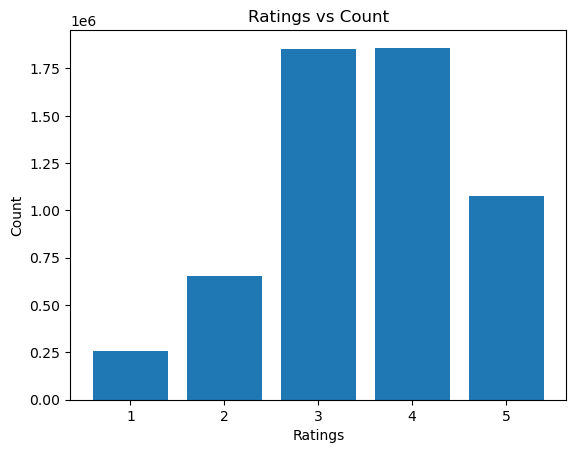

In [24]:
#plotting a bar graph for number of ratings vs ratings


import matplotlib.pyplot as plt


ratings_count = df['Ratings'].value_counts()


plt.bar(ratings_count.index, ratings_count)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Ratings vs Count")
plt.show()


In [25]:
# df.index = df.index.map(int)
# df

In [26]:
### Analytics on data and users

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from datetime import datetime
per_user_ratint=df.groupby(by="Customer_id")["Ratings"].count()
df['Date'] = pd.to_datetime(df['Date'])
df['Week_Day'] = df['Date'].dt.day_name()

df.head()

,Customer_id,Ratings,Date,Movie_Id,Week_Day
5119,1744889,1.0,2005-08-25,8,Thursday
5154,1205593,4.0,2005-05-09,8,Monday
5157,1488844,4.0,2005-05-12,8,Thursday
5175,306466,4.0,2005-07-01,8,Friday
5178,1331154,4.0,2005-07-03,8,Sunday


In [29]:
# extracted_ratings=df.groupby('Ratings')['Ratings'].agg(['count'])
# plt.barh(extracted_ratings.index, extracted_ratings.values.flatten(), color='green')

# #Setting the plot title and label
# movie_numbers=df.isnull().sum()
# user_numbers=df['Customer_id'].nunique() - movie_numbers
# plt.title(f'Total pool: {df.isnull().sum()[1]} Movies, {customer_count} Customers, {ratings_count} Ratings Given')
# plt.xlabel('Count')
# plt.ylabel('Ratings')

# # Show the plot
# plt.show()

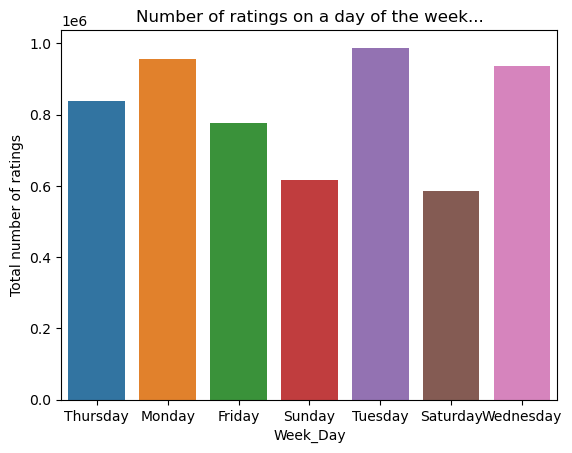

In [30]:
fig, ax = plt.subplots()
sns.countplot(x='Week_Day', data=df, ax=ax)
plt.title('Number of ratings on a day of the week...')
plt.ylabel('Total number of ratings')

plt.show()

In [31]:
df = df.drop('Date', axis=1)
print(df)

          Customer_id  Ratings  Movie_Id   Week_Day
5119          1744889      1.0         8   Thursday
5154          1205593      4.0         8     Monday
5157          1488844      4.0         8   Thursday
5175           306466      4.0         8     Friday
5178          1331154      4.0         8     Sunday
...               ...      ...       ...        ...
24056834       945992      3.0      4496  Wednesday
24056839        15737      4.0      4496    Tuesday
24056840       823628      5.0      4496    Tuesday
24056841       520675      3.0      4496   Thursday
24056842      1055714      5.0      4496     Monday

[5695573 rows x 4 columns]


The number of ratings per user: Movie_Id
8        2512
17       1266
18       4691
26       1585
28      10828
        ...  
4488    10125
4490     2677
4492     3091
4493     1931
4496     3138
Name: Customer_id, Length: 900, dtype: int64


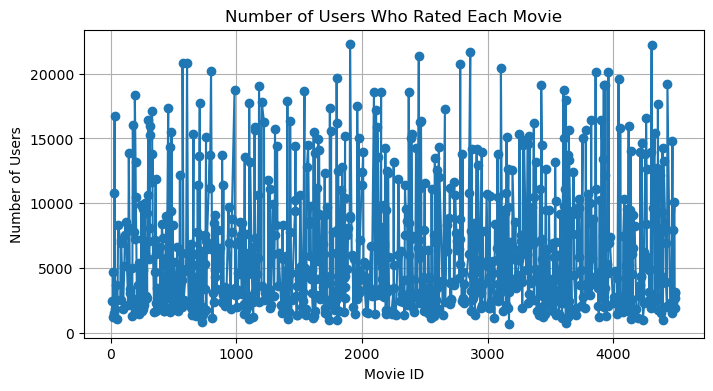

In [32]:
users_per_movie = df.groupby('Movie_Id')['Customer_id'].nunique()
print('The number of ratings per user:', users_per_movie)
# Plotting the line plot
plt.figure(figsize=(8, 4))
plt.plot(users_per_movie, marker='o', linestyle='-')
plt.title('Number of Users Who Rated Each Movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

          Customer_id  Ratings  Movie_Id   Week_Day
5119          1744889      1.0         8   Thursday
5154          1205593      4.0         8     Monday
5157          1488844      4.0         8   Thursday
5175           306466      4.0         8     Friday
5178          1331154      4.0         8     Sunday
...               ...      ...       ...        ...
24056834       945992      3.0      4496  Wednesday
24056839        15737      4.0      4496    Tuesday
24056840       823628      5.0      4496    Tuesday
24056841       520675      3.0      4496   Thursday
24056842      1055714      5.0      4496     Monday

[5695573 rows x 4 columns]


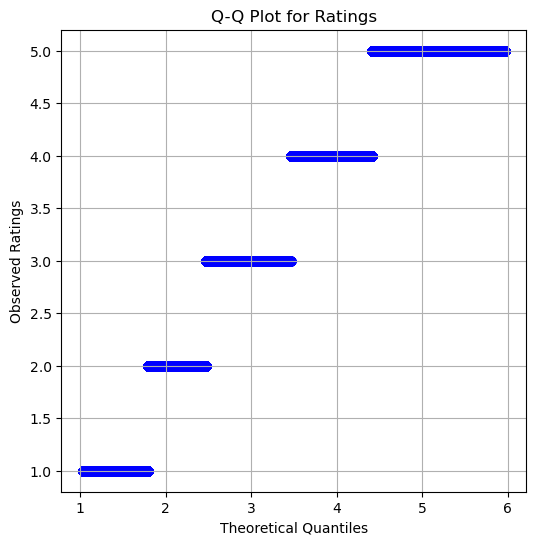

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


mean_rating = df['Ratings'].mean()
std_rating = df['Ratings'].std()
print(df)
normal_dist = stats.norm(loc=mean_rating, scale=std_rating)  # Normal distribution

#  theoretical quantiles
theoretical_quantiles = normal_dist.ppf(np.linspace(0.01, 0.99, len(df['Ratings'])))


sorted_ratings = np.sort(df['Ratings'])

# Q-Q plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sorted_ratings, color='blue', alpha=0.5)
plt.title('Q-Q Plot for Ratings')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Ratings')
plt.grid(True)
plt.show()


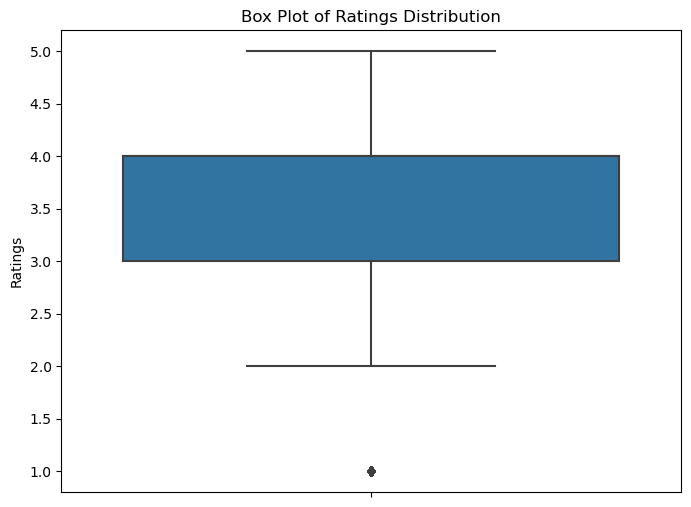

In [34]:
import seaborn as sns


# Assuming 'df' is your DataFrame with a 'Ratings' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Ratings'])

plt.ylabel('Ratings')
plt.title('Box Plot of Ratings Distribution')
plt.show()


In [35]:
#finding mean of ratings column
ratings_mean = df['Ratings'].mean()
print(ratings_mean)
#Now let us try to get the count of ratings for each movie and their avg ratings
# Group by 'movie_id' and calculate count and mean of 'ratings'
rating_stats = df.groupby('Movie_Id')['Ratings'].agg(['count', 'mean']).reset_index()

# Rename the columns for clarity
rating_stats.columns = ['Movie_Id', 'rating_count', 'mean_rating']
print(rating_stats)

3.4988423465031526
     Movie_Id  rating_count  mean_rating
0           8          2512     3.051752
1          17          1266     2.906793
2          18          4691     3.685355
3          26          1585     2.772240
4          28         10828     3.755079
..        ...           ...          ...
895      4488         10125     3.486815
896      4490          2677     3.124019
897      4492          3091     2.710773
898      4493          1931     3.159503
899      4496          3138     3.698215

[900 rows x 3 columns]


In [36]:
#Importing movie_titles CSV
# encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
movie_title = pd.read_csv(r'./movie_titles.csv', encoding = 'ISO-8859-1')
print(movie_title)
# df = pd.merge(df, movie_title[['Movie_Id','Name']], on = 'Movie_Id', how = 'left')
# df

       Movie_Id    Year                                               Name
0             1  2003.0                                    Dinosaur Planet
1             2  2004.0                         Isle of Man TT 2004 Review
2             3  1997.0                                          Character
3             4  1994.0                       Paula Abdul's Get Up & Dance
4             5  2004.0                           The Rise and Fall of ECW
...         ...     ...                                                ...
17765     17766  2002.0  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004.0                  Fidel Castro: American Experience
17767     17768  2000.0                                              Epoch
17768     17769  2003.0                                        The Company
17769     17770  2003.0                                       Alien Hunter

[17770 rows x 3 columns]


In [37]:
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable


In [38]:
rmse_results = []
mae_results = []


In [39]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate

# Load the data using Surprise
reader = Reader()
initial_dataset = Dataset.load_from_df(df[['Customer_id', 'Movie_Id', 'Ratings']][:200], reader)

##Model 1

# Create a KNNBasic model item_based
knn_model_item_based = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})  # Using item-based collaborative filtering

##Model 2

# Create a KNNBasic model user_based
knn_model_user_based = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})  # Using item-based collaborative filtering

# Perform cross-validation
results_user_based = cross_validate(knn_model_user_based, initial_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=True)
results_item_based = cross_validate(knn_model_item_based, initial_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.4291  1.3682  1.4192  0.7467  1.2010  1.2434 

In [40]:
import panel as pn  # GUI
from PIL import Image
pn.extension()

image_path = './byod.jfif'  # Replace with the path to your image
image = Image.open(image_path)

# Create a Pane for the image
image_pane = pn.pane.PNG(image, width=300, height=300)  # Adjust width and height as needed

# Add the image Pane to the Panel
panels = [image_pane]

In [41]:
user_id_to_predict=603277;
def chatbot_helper(_):
    user_id_to_predict = inp.value_input
    inp.value = ''

    return pn.Column(*panels)

Column
    [0] ParamFunction(function, _pane=Column, defer_load=False, loading_indicator=True)
    [1] TextInput(placeholder='Enter the customer i...)
    [2] Row
        [0] Button(name='Chat!')
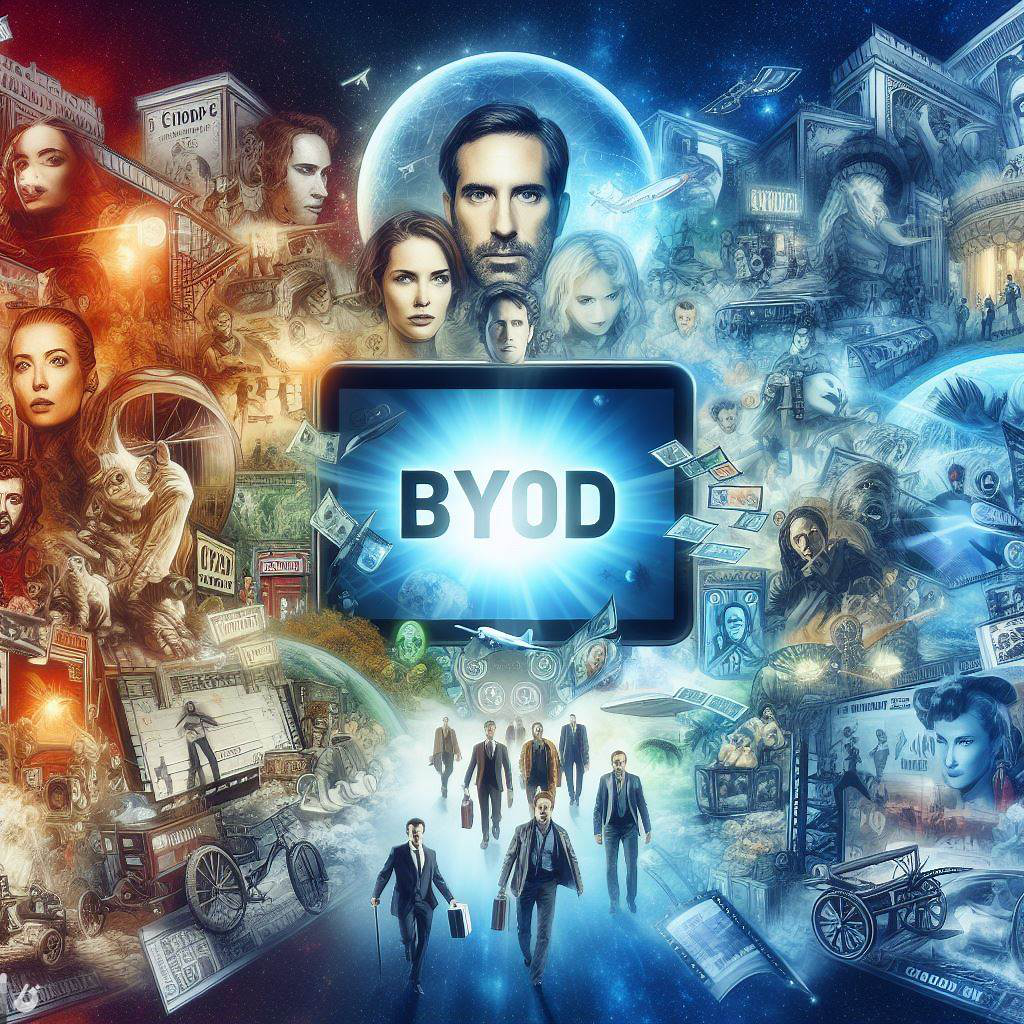

In [42]:
panels.append(
    pn.Row('BYOD Chatbot:', pn.pane.Markdown("Welcome To BYOD. Please enter the customer id for processing movie recommendations", width=600, styles={'background-color': '#F6F6F6'})))
inp = pn.widgets.TextInput(value="Hi", placeholder='Enter the customer id here…')
button_conversation = pn.widgets.Button(name="Chat!")
interactive_conversation = pn.bind(chatbot_helper,button_conversation)
dashboard = pn.Column(
    pn.panel(interactive_conversation, loading_indicator=True),
    inp,
    pn.Row(button_conversation)
)

dashboard

In [43]:
# Example of making recommendations for a specific user (e.g., Customer_id=603277)

# Create a dataset with movies rated 5 by the user
dataset_R5_KNN = df[(df['Customer_id'] == user_id_to_predict) & (df['Ratings'] == 5)]
dataset_R5_KNN = dataset_R5_KNN.set_index('Movie_Id')
dataset_R5_KNN = dataset_R5_KNN.join(movie_title)['Name']

# Create a copy of the movie_title DataFrame for predictions
test_cust_KNN = movie_title.copy()

# Load the full dataset for training
full_dataset_KNN = Dataset.load_from_df(df[['Customer_id', 'Movie_Id', 'Ratings']][:200], reader)
train_dataset_KNN = full_dataset_KNN.build_full_trainset()

# Train the KNN model item_based
knn_model_item_based.fit(train_dataset_KNN)

# Train the KNN model user_based
knn_model_user_based.fit(train_dataset_KNN)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [44]:
# Make predictions for the user
test_cust_KNN['Estimate_Rating-Item-based'] = test_cust_KNN['Movie_Id'].apply(lambda x: knn_model_item_based.predict(user_id_to_predict, x).est)
test_cust_KNN['Estimate_Rating-User-based'] = test_cust_KNN['Movie_Id'].apply(lambda x: knn_model_user_based.predict(user_id_to_predict, x).est)


# Sort movies by estimated rating
test_cust_KNN_item_based = test_cust_KNN.sort_values('Estimate_Rating-Item-based', ascending=False)
test_cust_KNN_user_based = test_cust_KNN.sort_values('Estimate_Rating-User-based', ascending=False)
not_test_cust_KNN_user_based = test_cust_KNN.sort_values('Estimate_Rating-User-based', ascending=True)
not_test_cust_KNN_item_based = test_cust_KNN.sort_values('Estimate_Rating-Item-based', ascending=True)
print('Top 10 recommended movies using KNNBasic item based are:')
print(test_cust_KNN_item_based.head(10))
print('Top 10 recommended movies using KNNBasic user based are:')
print(test_cust_KNN_user_based.head(10))


Top 10 recommended movies using KNNBasic item based are:
       Movie_Id    Year                                     Name  \
0             1  2003.0                          Dinosaur Planet   
11844     11845  1955.0                               Summertime   
11850     11851  1946.0                             The Yearling   
11849     11850  2003.0  Dumb and Dumberer: When Harry Met Lloyd   
11848     11849  1998.0                                    Earth   
11847     11848  1997.0                     For Richer or Poorer   
11846     11847  2005.0                            Dust to Glory   
11845     11846  1985.0                           Prizzi's Honor   
11843     11844  1967.0                     Barefoot in the Park   
11835     11836  1952.0                           Victory at Sea   

       Estimate_Rating-Item-based  Estimate_Rating-User-based  
0                            2.96                        2.96  
11844                        2.96                        2.96  
11

In [45]:
print('Top 10 movies not reccommended by user using KNNBasic item based are:')
print(not_test_cust_KNN_user_based.head(10))
print('Top 10 movies not reccommended by user using KNNBasic user based are:')
print(not_test_cust_KNN_item_based.head(10))

Top 10 movies not reccommended by user using KNNBasic item based are:
       Movie_Id    Year                   Name  Estimate_Rating-Item-based  \
0             1  2003.0        Dinosaur Planet                        2.96   
11837     11838  2004.0                  Omagh                        2.96   
11838     11839  2000.0             Mark Twain                        2.96   
11839     11840  1979.0  Nosferatu the Vampyre                        2.96   
11840     11841  2004.0              Cleopatra                        2.96   
11841     11842  2005.0                Bewafaa                        2.96   
11842     11843  1993.0    NYPD Blue: Season 1                        2.96   
11843     11844  1967.0   Barefoot in the Park                        2.96   
11844     11845  1955.0             Summertime                        2.96   
11845     11846  1985.0         Prizzi's Honor                        2.96   

       Estimate_Rating-User-based  
0                            2.96  

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

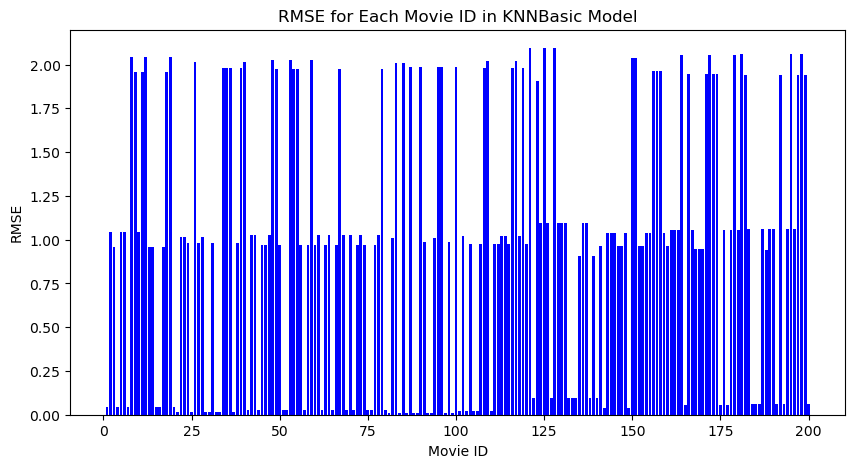

In [46]:
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold

from surprise import accuracy
rmse_values_item_based = []
rmse_values_user_based = []
kfolds = KFold(n_splits=10)

for trainset, testset in kfolds.split(initial_dataset):
    knn_model_item_based.fit(trainset)
    knn_model_user_based.fit(trainset)
    predictions_item_based = knn_model_item_based.test(testset)
    predictions_user_based = knn_model_user_based.test(testset)
    rmse_values_item_based.extend([accuracy.rmse([prediction], verbose=False) for prediction in predictions_item_based])
    rmse_values_user_based.extend([accuracy.rmse([prediction], verbose=False) for prediction in predictions_user_based])

# Plotting the RMSE values
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(rmse_values_item_based) + 1), rmse_values_item_based, color='blue')
plt.title('RMSE for Each Movie ID in KNNBasic Model')
plt.xlabel('Movie ID')
plt.ylabel('RMSE')
plt.show()

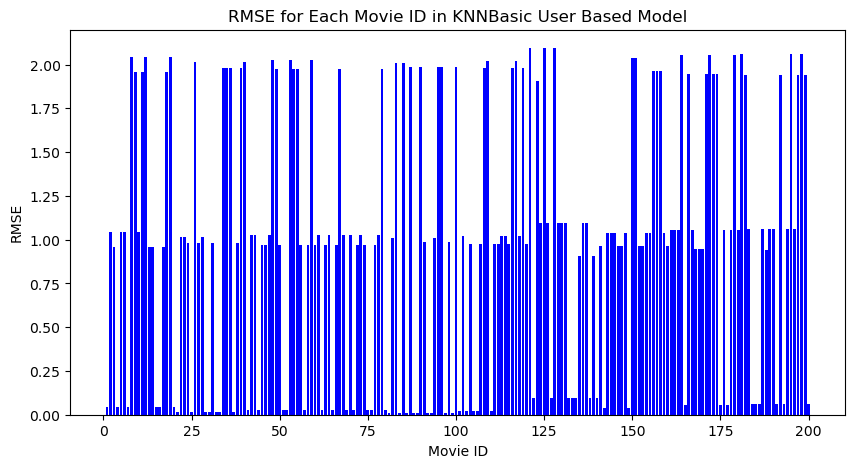

In [47]:
# Plotting the RMSE values
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(rmse_values_user_based) + 1), rmse_values_user_based, color='blue')
plt.title('RMSE for Each Movie ID in KNNBasic User Based Model')
plt.xlabel('Movie ID')
plt.ylabel('RMSE')
plt.show()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

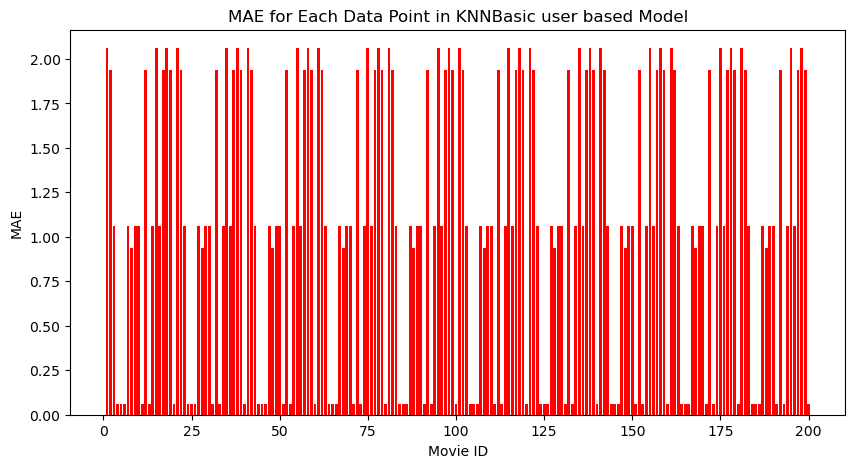

In [48]:
folds = KFold(n_splits=10)

# Store MSE values for each data point
mse_values_knn_item_based = []
mse_values_knn_user_based = []

for trainset, testset in kfolds.split(initial_dataset):
    knn_model_user_based.fit(trainset)
    knn_model_user_based.fit(trainset)
    predictionsmse_user_based = knn_model_user_based.test(testset)
    predictionsmse_item_based = knn_model_item_based.test(testset)
    mse_values_knn_user_based.extend([accuracy.mae([prediction], verbose=False) for prediction in predictions_user_based])
    mse_values_knn_item_based.extend([accuracy.mae([prediction], verbose=False) for prediction in predictions_item_based])

# Plotting the MSE values for KNNBasic as a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(mse_values_knn_user_based) + 1), mse_values_knn_user_based, color='red')
plt.title('MAE for Each Data Point in KNNBasic user based Model')
plt.xlabel('Movie ID')
plt.ylabel('MAE')
plt.show()

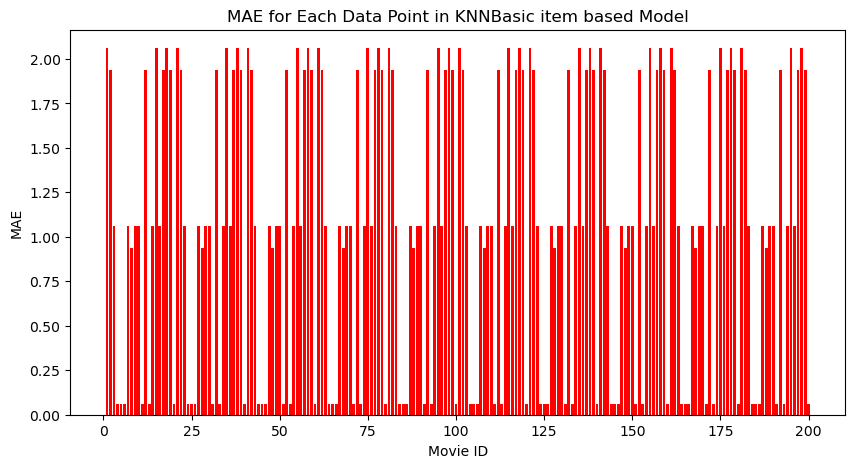

In [49]:
# Plotting the MSE values for KNNBasic as a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(mse_values_knn_item_based) + 1), mse_values_knn_item_based, color='red')
plt.title('MAE for Each Data Point in KNNBasic item based Model')
plt.xlabel('Movie ID')
plt.ylabel('MAE')
plt.show()

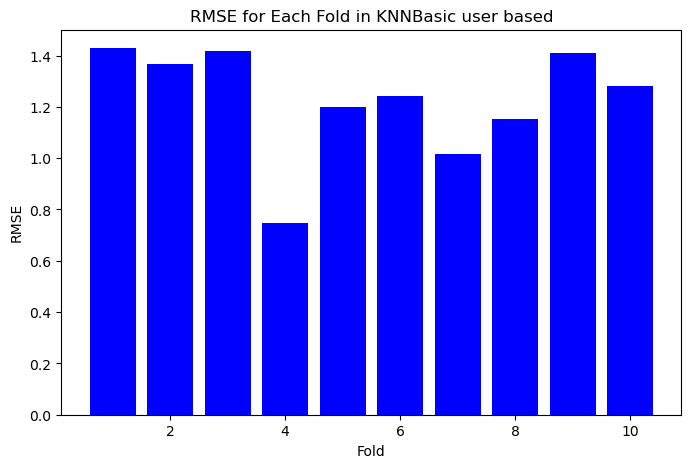

In [50]:
fold_rmse_values_user_based = results_user_based['test_rmse']

# Plot RMSE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_rmse_values_user_based) + 1), fold_rmse_values_user_based, color='blue')
plt.title('RMSE for Each Fold in KNNBasic user based')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

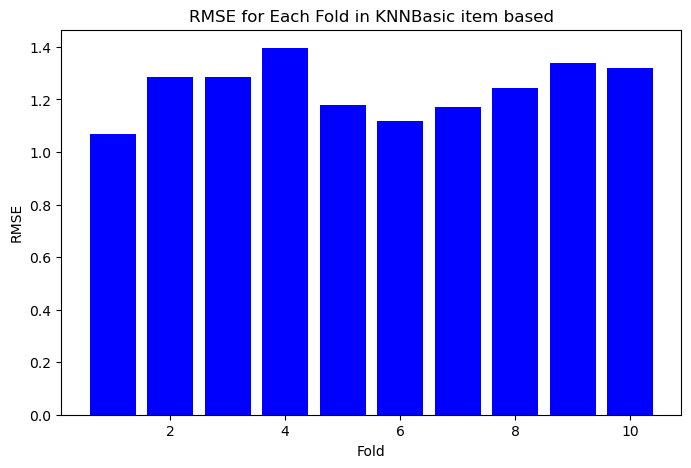

In [51]:
fold_rmse_values_item_based = results_item_based['test_rmse']

# Plot RMSE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_rmse_values_item_based) + 1), fold_rmse_values_item_based, color='blue')
plt.title('RMSE for Each Fold in KNNBasic item based')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

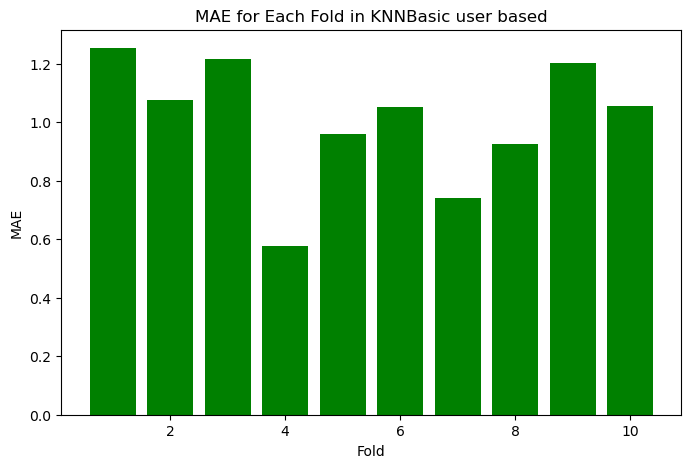

In [52]:
#MAE for each fold
fold_mae_values_user_based = results_user_based['test_mae']

# Plot MAE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_mae_values_user_based) + 1), fold_mae_values_user_based, color='green')
plt.title('MAE for Each Fold in KNNBasic user based')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.show()

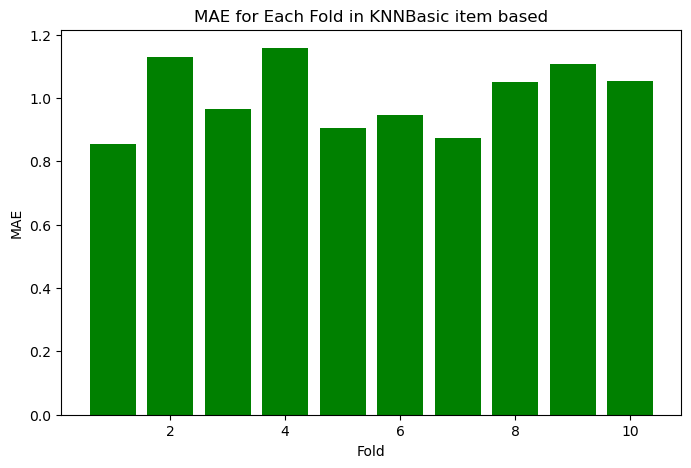

In [53]:
#MAE for each fold
fold_mae_values_item_based = results_item_based['test_mae']

# Plot MAE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_mae_values_item_based) + 1), fold_mae_values_item_based, color='green')
plt.title('MAE for Each Fold in KNNBasic item based')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.show()

In [54]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate

reader = Reader()

initial_dataset = Dataset.load_from_df(df[['Customer_id', 'Movie_Id', 'Ratings']][:200], reader)

svd_model = SVD()
results = cross_validate(svd_model, initial_dataset, measures=['RMSE', 'MAE'], cv=10, verbose=True)
# rmse_results.append(results['test_rmse'].mean())
# mae_results.append(results['test_mae'].mean())
# print(results)
# svd_model.fit(trainset)


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1837  1.3480  1.4412  1.2306  1.0267  1.3237  1.2044  1.4491  1.1272  1.0489  1.2384  0.1422  
MAE (testset)     0.9767  1.1156  1.1684  0.9200  0.7627  1.1557  0.9525  1.3005  0.8789  0.8033  1.0034  0.1658  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    


In [55]:
trimmed_df = df[['Customer_id', 'Movie_Id', 'Ratings']]

In [56]:
df = df.drop('Week_Day',axis=1)
print(df)

          Customer_id  Ratings  Movie_Id
5119          1744889      1.0         8
5154          1205593      4.0         8
5157          1488844      4.0         8
5175           306466      4.0         8
5178          1331154      4.0         8
...               ...      ...       ...
24056834       945992      3.0      4496
24056839        15737      4.0      4496
24056840       823628      5.0      4496
24056841       520675      3.0      4496
24056842      1055714      5.0      4496

[5695573 rows x 3 columns]


In [57]:
#Creating a dataset which the user liked in past
# Let us consider for a particular user with customer_id = user_id_to_predict and has given 5 ratings:
dataset_R5 = trimmed_df[(trimmed_df['Customer_id']==user_id_to_predict) & (trimmed_df['Ratings']==5)]
# print(dataset_R5)
dataset_R5 = dataset_R5.set_index('Movie_Id')
dataset_R5 = dataset_R5.join(movie_title)['Name']
# dataset_1488844 = dataset_1488844.join(df_title)['Name']
print(dataset_R5)

Movie_Id
191                                   The SoulTaker
313     Saturday Night Live: The Best of Jon Lovitz
357                                 The Onion Field
798                           Teen Titans: Season 1
1224                 Jim Breuer: Heavy Metal Comedy
1590                        Count Duckula: Season 1
1625       Suze Orman: 9 Steps to Financial Freedom
1692                                         Sphere
2128                     The Twilight Zone: Vol. 41
2430                                      Nuremberg
2452                                      Happy End
2913                                         Kasoor
3017                         WWE: Judgment Day 2004
3106                                          Mulan
3124                     Chi-Hwa-Seon: Painted Fire
3269                    Where the Rivers Flow North
3320                                      In Dreams
3437                    Sharpe 12: Sharpe's Revenge
3582                                   Exit to Eden
387

In [58]:
#Creating a dataset which the user liked in past
# Let us consider for a particular user with customer_id = user_id_to_predict and has given 5 ratings:
dataset_R1 = trimmed_df[(trimmed_df['Customer_id']==user_id_to_predict) & (trimmed_df['Ratings']==1)]
# print(dataset_R5)
dataset_R1 = dataset_R1.set_index('Movie_Id')
dataset_R1 = dataset_R1.join(movie_title)['Name']
# dataset_1488844 = dataset_1488844.join(df_title)['Name']
print(dataset_R1)

Movie_Id
8                     Class of Nuke 'Em High 2
148            The Edward R. Murrow Collection
187                                 Dead Birds
295         In His Life: The John Lennon Story
548                               Rage at Dawn
638                    Jim Brown: All-American
831                        Tupac: Resurrection
833                          Niagara: Miracles
894                                Dersu Uzala
1406                      Orphans of the Storm
1530                              The Crucible
1532                                      Darr
1582                                      Moog
1693                     A Lesson Before Dying
2163                      Rory O'Shea Was Here
2200                   The Alexander Technique
2386        Luther Vandross: Journeys in Black
3350              Gospel According to Al Green
3571            Aftermath: The Remnants of War
3715                              The Big Blue
3736                                      Gacy
3824

In [59]:
test_cust = movie_title.copy()
#training on full dataset
full_dataset = Dataset.load_from_df(df[['Customer_id', 'Movie_Id', 'Ratings']], reader)
# building the training set
train_dataset = full_dataset.build_full_trainset()
  #training the dataset
svd_model.fit(train_dataset)
  #Prediction
test_cust['Estimate_Rating'] = test_cust['Movie_Id'].apply(lambda x: svd_model.predict(id, x).est)
  #est is used to recommend rating from the trained SVD
test_cust = test_cust.sort_values('Estimate_Rating')
  # print(test_cust.head(10))
test_cust = test_cust.sort_values('Estimate_Rating', ascending=False)
print('Top 10 recommended movies are:')
print(test_cust.head(10))

Top 10 recommended movies are:
      Movie_Id    Year                                           Name  \
3455      3456  2004.0                                 Lost: Season 1   
2101      2102  1994.0                         The Simpsons: Season 6   
2451      2452  2001.0  Lord of the Rings: The Fellowship of the Ring   
3289      3290  1974.0                                  The Godfather   
2861      2862  1991.0                       The Silence of the Lambs   
4305      4306  1999.0                                The Sixth Sense   
2171      2172  1991.0                         The Simpsons: Season 3   
2161      2162  2000.0                                  CSI: Season 1   
3443      3444  2004.0          Family Guy: Freakin' Sweet Collection   
4426      4427  2001.0                        The West Wing: Season 3   

      Estimate_Rating  
3455         4.594034  
2101         4.369542  
2451         4.346870  
3289         4.311509  
2861         4.287613  
4305         4.277279

In [60]:
print('10 movies the user would least Recommend :')
least_liked = test_cust.sort_values('Estimate_Rating', ascending=True)
print(least_liked.head(10))

10 movies the user would least Recommend :
      Movie_Id    Year                                         Name  \
3020      3021  2003.0                            House of the Dead   
3504      3505  2001.0                          Freddy Got Fingered   
3572      3573  1993.0                               Cop and a Half   
361        362  2000.0           The Flintstones in Viva Rock Vegas   
3566      3567  2004.0  Starship Troopers 2: Hero of the Federation   
1288      1289  1990.0                       Look Who's Talking Too   
1099      1100  2000.0                            Dr. T & the Women   
1524      1525  2001.0                                   Monkeybone   
4126      4127  1994.0                              The Flintstones   
3639      3640  2003.0                           Inspector Gadget 2   

      Estimate_Rating  
3020         1.882388  
3504         2.134023  
3572         2.183466  
361          2.247423  
3566         2.282878  
1288         2.324691  
1099   

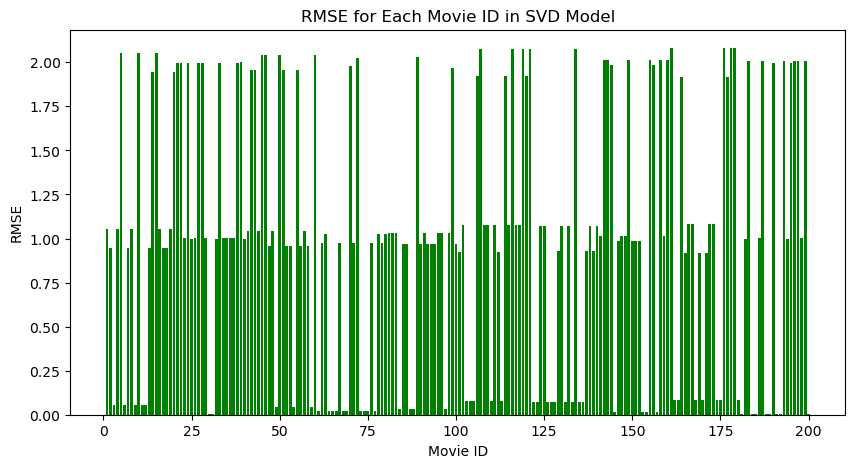

In [61]:
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import KFold
from surprise import accuracy

kfolds = KFold(n_splits=10)

# Store RMSE values for each data point
rmse_values_svd = []

for trainset, testset in kfolds.split(initial_dataset):
    svd_model.fit(trainset)
    predictions = svd_model.test(testset)
    rmse_values_svd.extend([accuracy.rmse([prediction], verbose=False) for prediction in predictions])

# Plotting the RMSE values for SVD as a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(rmse_values_svd) + 1), rmse_values_svd, color='green')
plt.title('RMSE for Each Movie ID in SVD Model')
plt.xlabel('Movie ID')
plt.ylabel('RMSE')
plt.show()


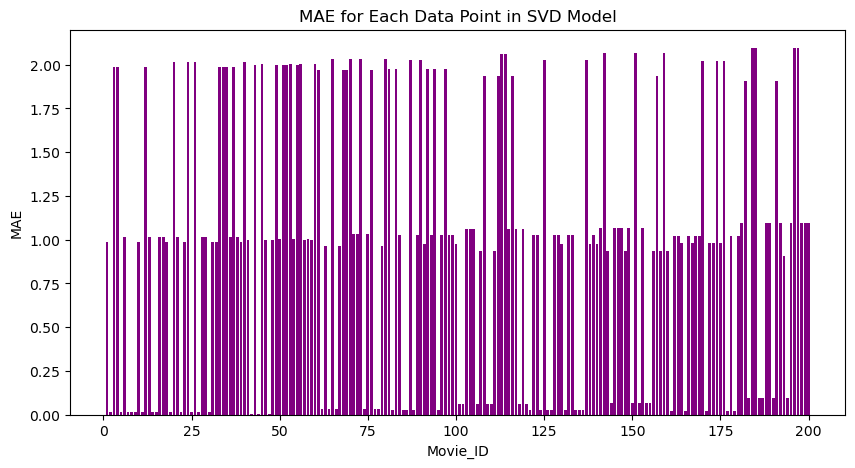

In [62]:
kfolds = KFold(n_splits=10)

# Store MSE values for each data point
mae_values_svd = []

for trainset, testset in kfolds.split(initial_dataset):
    svd_model.fit(trainset)
    predictions = svd_model.test(testset)
    mae_values_svd.extend([accuracy.mae([prediction], verbose=False) for prediction in predictions])

# Plotting the MSE values for SVD as a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(mae_values_svd) + 1), mae_values_svd, color='purple')
plt.title('MAE for Each Data Point in SVD Model')
plt.xlabel('Movie_ID')
plt.ylabel('MAE')
plt.show()

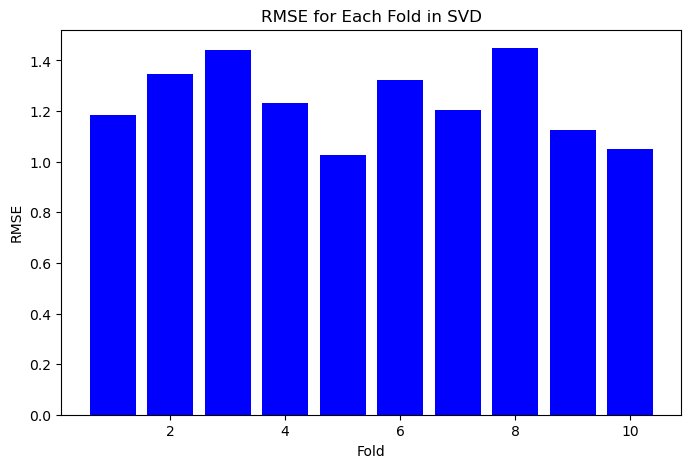

In [63]:
fold_rmse_values = results['test_rmse']

# Plot RMSE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_rmse_values) + 1), fold_rmse_values, color='blue')
plt.title('RMSE for Each Fold in SVD')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

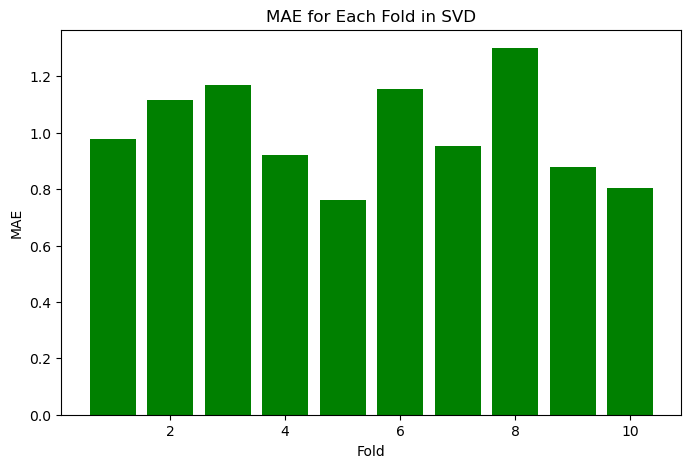

In [64]:
#MAE for each fold
fold_mae_values = results['test_mae']

# Plot MAE values for each fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(fold_mae_values) + 1), fold_mae_values, color='green')
plt.title('MAE for Each Fold in SVD')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.show()

In [65]:
# plt.figure(figsize=(10, 5))
# plt.bar(range(1, len(mse_values_svd) + 1), mse_values_svd, color='purple')
# plt.title('MAE for Each Data Point in SVD Model')
# plt.xlabel('Data Point')
# plt.ylabel('MAE')
# plt.show()

XGBoost Implementation

In [66]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Creating the feature matrix (X) and target variable (y) for training
X_train = train_data[['Customer_id', 'Movie_Id']]
y_train = train_data['Ratings']

X_train
y_train

23209428    3.0
5092360     3.0
12114280    3.0
409119      1.0
2946336     3.0
           ... 
6777704     5.0
9362632     3.0
20607993    3.0
18099451    4.0
7282205     5.0
Name: Ratings, Length: 4556458, dtype: float64

In [68]:
# Creating the feature matrix (X) and target variable (y) for testing
X_test = test_data[['Customer_id', 'Movie_Id']]
y_test = test_data['Ratings']

X_test
y_test

18864297    4.0
1632381     4.0
10121830    3.0
12635691    4.0
7010053     2.0
           ... 
8124946     5.0
19814301    3.0
12401493    3.0
8096147     5.0
9336795     1.0
Name: Ratings, Length: 1139115, dtype: float64

In [69]:
# Creating an instance of the XGBRegressor
xgb_model = XGBRegressor()

# Training the XGBoost model
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculating RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.0343481734896713


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1918  1.1849  1.2134  1.2017  1.2368  1.2057  0.0183  
MAE (testset)     0.9504  0.9417  0.9581  0.9549  0.9912  0.9593  0.0169  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.02    0.01    0.01    0.02    0.02    0.02    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

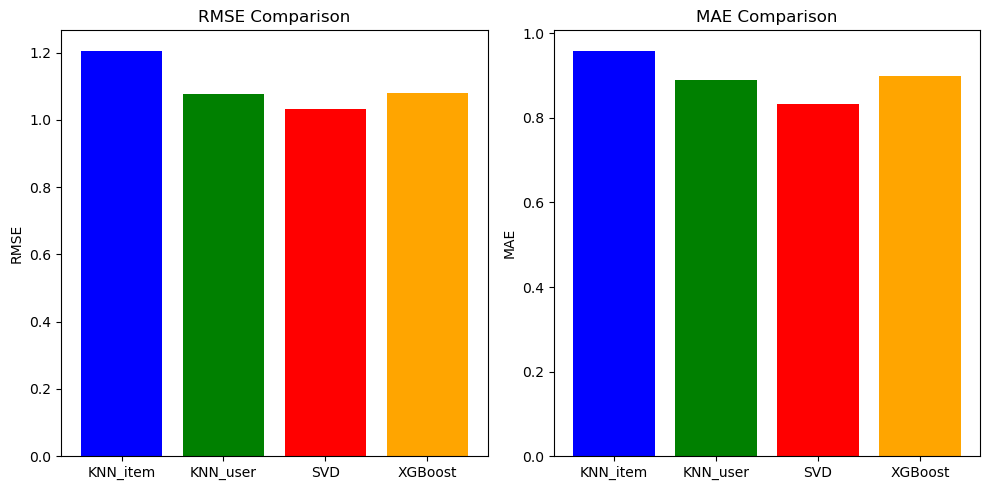

In [70]:
#Comparing the models

# Create lists to store results
models = [knn_model_item_based,knn_model_user_based, svd_model]
model_names = ['KNN_item','KNN_user', 'SVD', 'XGBoost']
rmse_results = []
mae_results = []

# Perform cross-validation and store results
for model, name in zip(models, model_names):
    results = cross_validate(model, Dataset.load_from_df(df[['Customer_id', 'Movie_Id', 'Ratings']][:15000], reader), measures=['RMSE', 'MAE'], cv=5, verbose=True)
    rmse_results.append(results['test_rmse'].mean())
    mae_results.append(results['test_mae'].mean())

# Plotting RMSE and MAE graphs
plt.figure(figsize=(10, 5))

# RMSE
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_results, color=['blue', 'green','red', 'orange'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 2, 2)
plt.bar(model_names, mae_results, color=['blue', 'green','red', 'orange'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [71]:
!pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
### Sentence Transformer Logic

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

def sentence_tokenizer(list_of_movies):
  # Initialize the SentencePiece tokenizer using AutoTokenizer
  tokenizer = AutoTokenizer.from_pretrained("t5-base")

  # Initialize the model
  model_name = "t5-base"
  model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

#  list_of_movies = ['Interstellar', 'Dunkirk', 'Inception', 'Oppenheimer']
  # list_of_movies=test_cust.head(10)
  moviesentence = ""
  for idx, movie in enumerate(list_of_movies):
    moviesentence += movie
    moviesentence += " "
  # Define the input sentence
  input_sentence = f"""
  These are the movies that we will recommend to you.
  Based on your taste, you are likely to enjoy this. {moviesentence}
  """


  # Tokenize the input sentence using the tokenizer
  input_ids = tokenizer.encode(input_sentence, return_tensors="pt")

  # Generate paraphrases using beam search
  generated_outputs = model.generate(input_ids, max_length=512, num_beams=1, num_return_sequences=1)

  # Decode the generated paraphrases, removing special tokens
  paraphrased_sentences = [tokenizer.decode(output, skip_special_tokens=True) for output in generated_outputs]

  # Print the original sentence and its paraphrases
  # print("Original sentence:", input_sentence)
  print("\LLM Output:")
  for paraphrase in paraphrased_sentences:
      print("- " + paraphrase)

In [ ]:
sentence_tokenizer(list_of_movies)

In [ ]:
# import os

# os.environ['HUGGINGFACEHUB_API_TOKEN'] = process.env.huggingfacekey

# from langchain import PromptTemplate, HuggingFaceHub, LLMChain

# template = """Question: {question}
# Answer: Let's think step by step.
# """

# prompt = PromptTemplate(template=template, input_variables=["question"])

# llm_chain = LLMChain(prompt=prompt,
#                      llm=HuggingFaceHub(repo_id="google/flan-t5-xxl",
#                                         model_kwargs={"temperature": 10,
#                                                       "max_length": 64}))

# question = ""

# print(llm_chain.run(question))